/tmp/ipython-input-3-874921651.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()  # Monthly sales


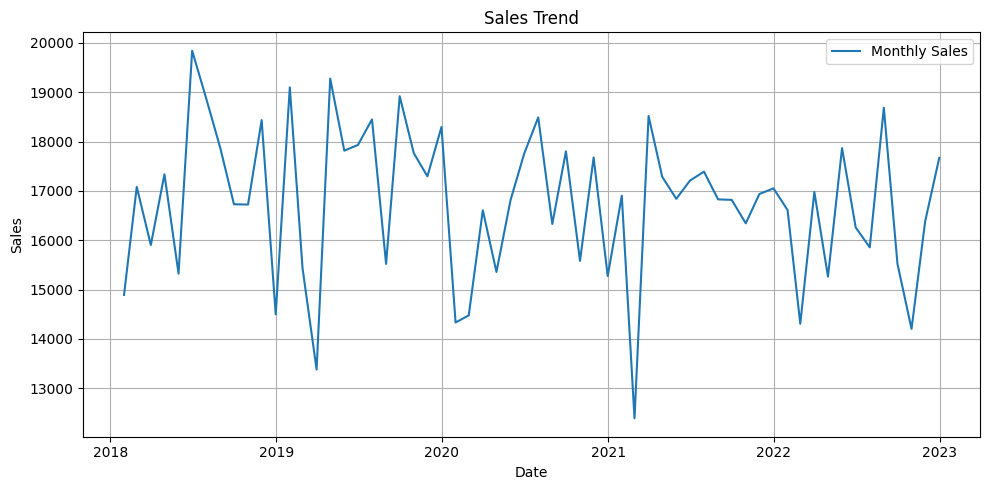

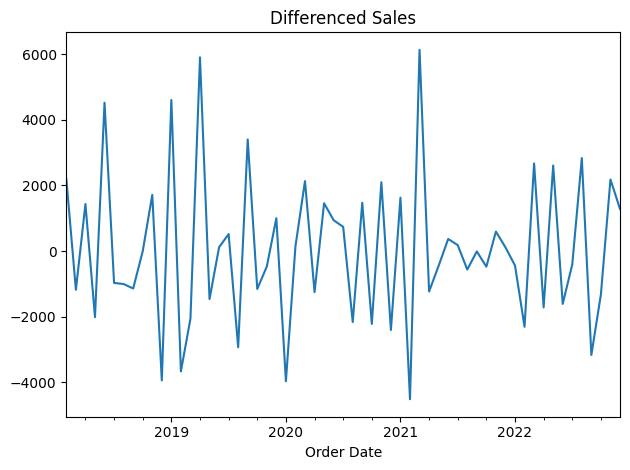

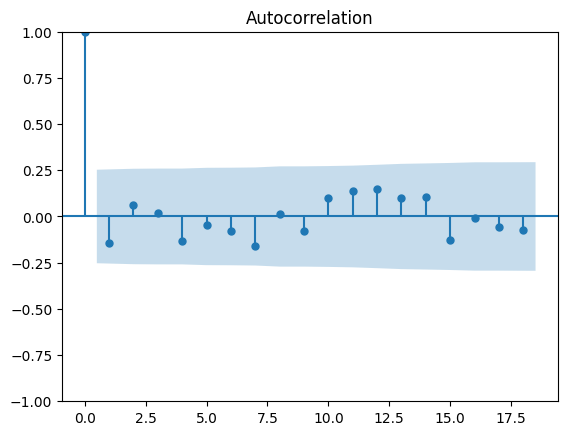

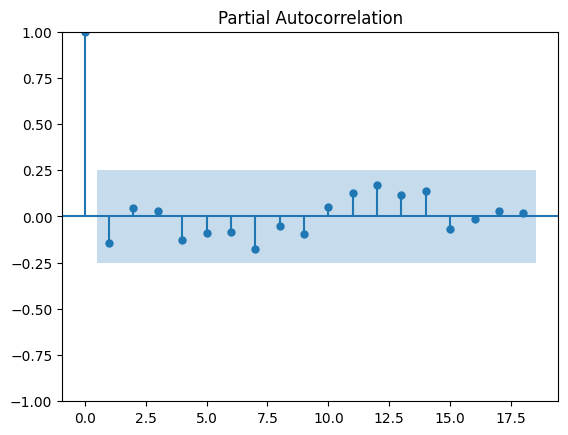

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -534.041
Date:                Tue, 24 Jun 2025   AIC                           1074.082
Time:                        14:34:33   BIC                           1080.315
Sample:                    01-31-2018   HQIC                          1076.515
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0100      0.176     -0.057      0.955      -0.355       0.335
ma.L1         -0.4648      0.209     -2.228      0.026      -0.874      -0.056
sigma2      4.004e+06    7.3e+05      5.487      0.0

/tmp/ipython-input-3-874921651.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_forecast = pd.DataFrame(forecast, index=pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=6, freq='M'), columns=['Forecast'])


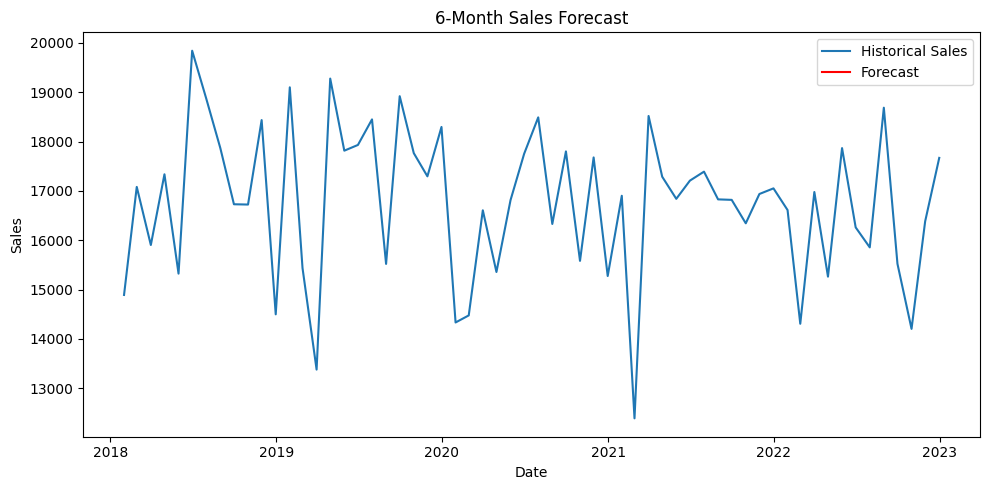

In [3]:
# 📌 Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import os

# 📌 Step 2: Load dataset
df = pd.read_csv('/content/sales.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df[['Order Date', 'Sales']].sort_values('Order Date')
df = df.set_index('Order Date')
df = df.resample('M').sum()  # Monthly sales

# Create 'plots' directory if it doesn't exist
if not os.path.exists('plots'):
    os.makedirs('plots')

# 📌 Step 3: Exploratory Data Analysis
plt.figure(figsize=(10, 5))
plt.plot(df['Sales'], label='Monthly Sales')
plt.title("Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('plots/sales_trend.png')
plt.show()

# 📌 Step 4: Check Stationarity (optional)
df['Sales_diff'] = df['Sales'].diff().dropna()
df['Sales_diff'].dropna().plot(title="Differenced Sales")
plt.tight_layout()
plt.show()

# 📌 Step 5: ACF & PACF plots
plot_acf(df['Sales'].dropna())
plot_pacf(df['Sales'].dropna())
plt.show()

# 📌 Step 6: ARIMA Model
model = ARIMA(df['Sales'], order=(1, 1, 1))  # Order may vary
model_fit = model.fit()
print(model_fit.summary())

# 📌 Step 7: Forecast future sales
forecast = model_fit.forecast(steps=6)
df_forecast = pd.DataFrame(forecast, index=pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=6, freq='M'), columns=['Forecast'])

# 📌 Step 8: Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Sales'], label='Historical Sales')
plt.plot(df_forecast['Forecast'], label='Forecast', color='red')
plt.title("6-Month Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.savefig('plots/forecast_plot.png')
plt.show()